# Ejercicio 1

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

plt.rcParams['figure.figsize'] = (25, 10)
plt.style.use('seaborn')

In [52]:
dir_actual = os.getcwd()
archivos_dump = list(map(lambda x: f'{dir_actual}\{x}', glob.glob('Apoyo Desafío - Naive Bayes/dump/*.csv')))

dfs = (pd.read_csv(f) for f in archivos_dump)
df = pd.concat(dfs).drop(columns='Unnamed: 0')
df.columns = ['artist', 'genre', 'song_name', 'lyrics']

# Ejercicio 2

<AxesSubplot:xlabel='artist'>

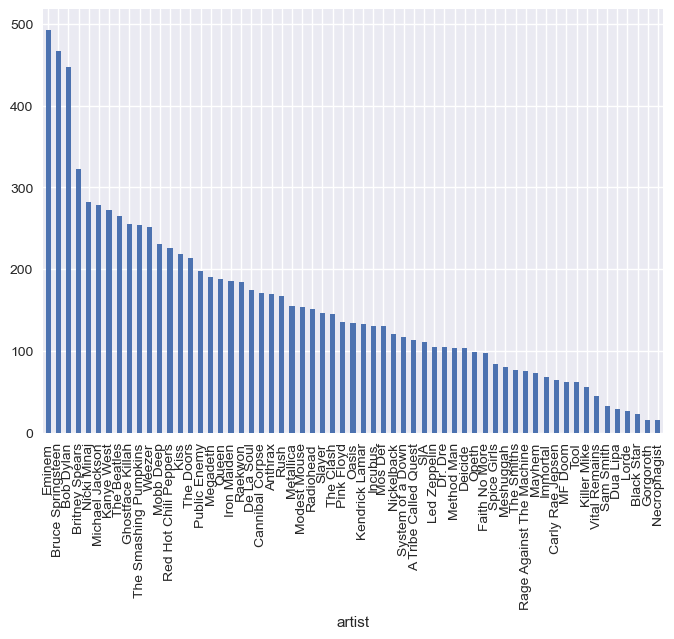

In [53]:
cantidad_canciones_por_artista = df.groupby('artist')['song_name'].count().sort_values(ascending=False)
cantidad_canciones_por_artista.plot(kind='bar')

- Eminem, Bruce Springsteen, Bob Dylan, Britney Spears, Nicki Minaj y Michael Jackson son los artistas con la mayor cantidad de canciones (~460 canciones en promedio).

- Sam Smith, Dua Lipa, Lorde, Black Star, Gorgoroth y Necrophagist son los artistas con la menor cantidad de canciones (~16 canciones en promedio).

<AxesSubplot:xlabel='genre'>

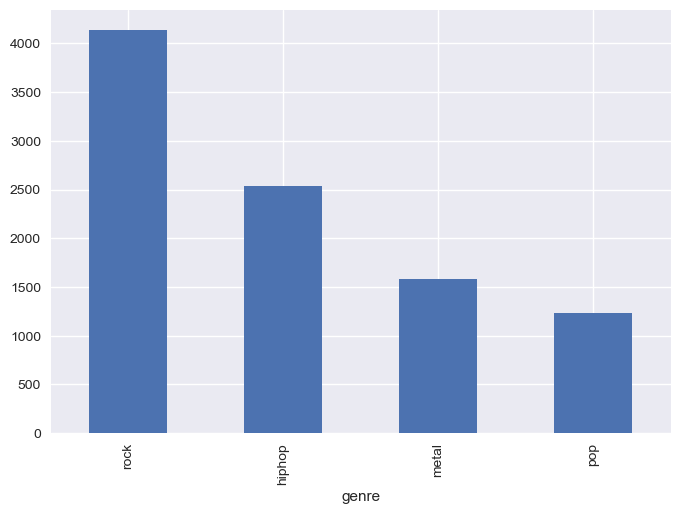

In [54]:
cantidad_canciones_por_genero = df.groupby('genre')['song_name'].count().sort_values(ascending=False)
cantidad_canciones_por_genero.plot(kind='bar')

- El genero rock es el que tiene la mayor cantidad de canciones distintas, con aproximadamente 4100 canciones.

- El genero pop es el que tiene la menor cantidad de canciones distintas, con aproximadamente 1300 canciones